In [1]:
from torch.nn import CrossEntropyLoss
from transformer import TransformerMT
from torch import optim
from data_loader import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = EnFrDataset(used_abridged_data=True, max_seq_length=100)

train_dataloader = DataLoader(data, batch_size=32, shuffle=False, num_workers=0)

transformer_mt = TransformerMT(
    source_vocabulary_size=data.get_src_lang_size(),
    target_vocabulary_size=data.get_tgt_lang_size(),
    embedding_size=512,
    max_num_embeddings=100,
    num_attention_heads=8,
    num_encoder_layers=6,
    num_decoder_layers=6,
    linear_layer_size=2048,
    dropout=0.1,
    activation='relu',
    layer_norm_eps=1e-5,
    batch_first=False,
    norm_first=False,
    bias=True
)
transformer_mt.to(device)

transformer_mt.train()

optimizer = optim.Adam(transformer_mt.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

loss_criterion = CrossEntropyLoss(ignore_index=0)

epoch_losses = []
for e in range(30):
    transformer_mt
    running_loss = 0
    for en_token_ids, fr_token_ids in train_dataloader:
        en_token_ids.to(device)
        fr_token_ids.to(device)

        optimizer.zero_grad()
    
        output = transformer_mt(src=en_token_ids, tgt=fr_token_ids[:-1, :])
        
        loss = loss_criterion(output.reshape(-1, output.shape[-1]), fr_token_ids[1:, :].reshape(-1))
    
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()

    epoch_losses.append(running_loss)
    print(f"epoch: {e+1}, epoch loss: {round(running_loss, 3)}")

Creating abridged dataset...
Reading the dataframe and storing untokenized pairs...


100%|██████████| 1000/1000 [00:00<00:00, 114717.58it/s]


Adding sentences to Langs amd geting data pairs...


100%|██████████| 1000/1000 [00:00<00:00, 2758.29it/s]


Creating tokenized pairs of english and french sentences...


100%|██████████| 1000/1000 [00:00<00:00, 9138.95it/s]
/Users/joelmire/miniconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


epoch: 1, epoch loss: 79.308
epoch: 2, epoch loss: 60.525
epoch: 3, epoch loss: 58.041
epoch: 4, epoch loss: 57.415
epoch: 5, epoch loss: 57.189
epoch: 6, epoch loss: 56.948
epoch: 7, epoch loss: 56.54
epoch: 8, epoch loss: 56.386
epoch: 9, epoch loss: 56.245
epoch: 10, epoch loss: 56.152
epoch: 11, epoch loss: 56.247
epoch: 12, epoch loss: 55.994
epoch: 13, epoch loss: 55.849
epoch: 14, epoch loss: 55.487
epoch: 15, epoch loss: 55.297
epoch: 16, epoch loss: 55.077
epoch: 17, epoch loss: 55.028
epoch: 18, epoch loss: 54.939
epoch: 19, epoch loss: 54.851
epoch: 20, epoch loss: 54.554
epoch: 21, epoch loss: 54.351
epoch: 22, epoch loss: 54.233
epoch: 23, epoch loss: 53.953
epoch: 24, epoch loss: 53.811
epoch: 25, epoch loss: 53.533
epoch: 26, epoch loss: 53.205
epoch: 27, epoch loss: 52.909
epoch: 28, epoch loss: 52.604
epoch: 29, epoch loss: 52.326
epoch: 30, epoch loss: 52.078


[79.30840229988098, 60.52522027492523, 58.04114770889282, 57.41509461402893, 57.18946558237076, 56.947907626628876, 56.54048764705658, 56.38610762357712, 56.24526047706604, 56.15225446224213, 56.24650013446808, 55.99440437555313, 55.84944212436676, 55.48693758249283, 55.29683876037598, 55.076701641082764, 55.027770936489105, 54.93891990184784, 54.850665628910065, 54.554074227809906, 54.35051292181015, 54.23271709680557, 53.95336353778839, 53.81109011173248, 53.533433973789215, 53.20516461133957, 52.909401297569275, 52.60447424650192, 52.32636350393295, 52.077720284461975]


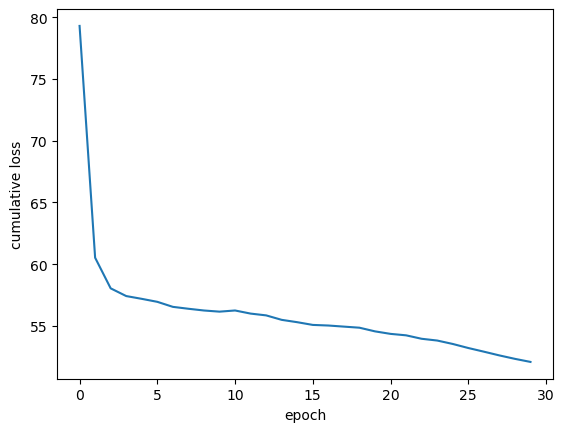

In [2]:
print(epoch_losses)
plt.plot(epoch_losses)
plt.ylabel('cumulative loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('epoch_losses.png')